Seaborn-Intro

In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import ast
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df_DA = df[df['job_title_short']=='Data Analyst'].copy()

In [2]:
import seaborn as sns

In [3]:
df_DA_US=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
df_DA_US=df_DA_US.dropna(subset=['salary_year_avg'])

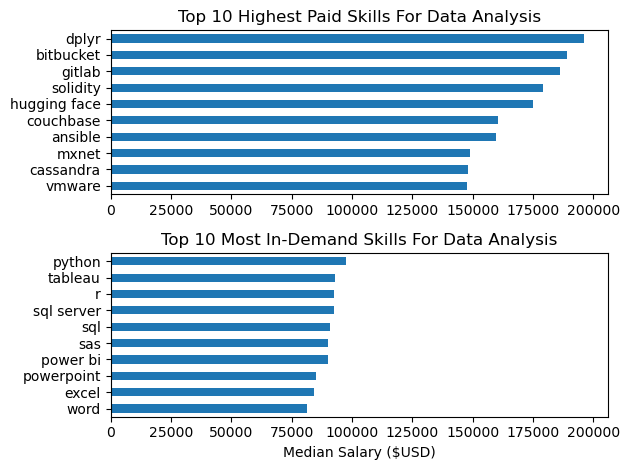

In [4]:
df_DA_US=df_DA_US.explode('job_skills')
df_DA_US[['salary_year_avg','job_skills']]
df_DA_US_group=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_DA_top_pay=df_DA_US_group.sort_values(by='median',ascending=False).head(10)
df_DA_skills=df_DA_US_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)
fig, ax=plt.subplots(2,1)
df_DA_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0],legend=False)
ax[0].set_title('Top 10 Highest Paid Skills For Data Analysis')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
# ax[0].invert_yaxis() this or above colon method to invert
df_DA_skills[::-1].plot(kind='barh',y='median',ax=ax[1],legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills For Data Analysis')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_xlim(ax[0].get_xlim())
plt.tight_layout()
plt.show()




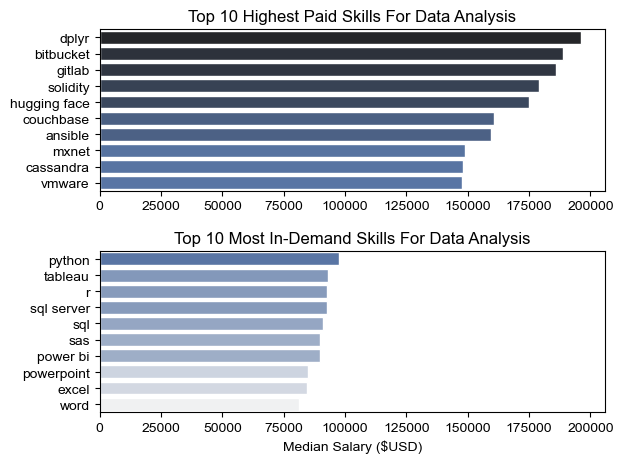

In [5]:
fig, ax=plt.subplots(2,1)
sns.set_theme(style="ticks")
sns.barplot(data=df_DA_top_pay,x='median',y=df_DA_top_pay.index,ax=ax[0],hue='median',palette='dark:b_r') #_r to reverse color
ax[0].legend().remove()
# df_DA_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0],legend=False)
ax[0].set_title('Top 10 Highest Paid Skills For Data Analysis')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
# ax[0].invert_yaxis() this or above colon method to invert
# df_DA_skills[::-1].plot(kind='barh',y='median',ax=ax[1],legend=False)
sns.barplot(data=df_DA_skills,x='median',y=df_DA_skills.index,ax=ax[1],hue='median',palette='light:b')
ax[1].legend().remove()
ax[1].set_title('Top 10 Most In-Demand Skills For Data Analysis')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_xlim(ax[0].get_xlim())
plt.tight_layout()
plt.show()

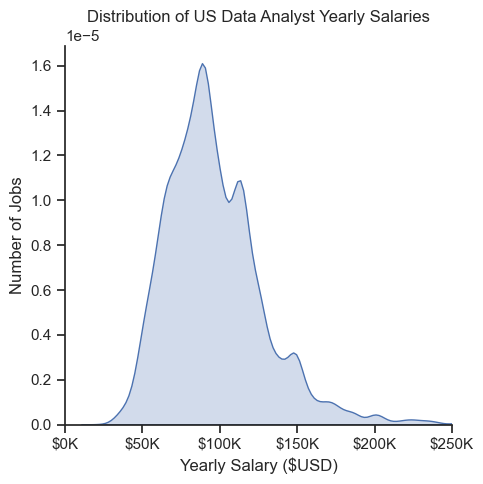

In [8]:
sns.displot(df_DA_US['salary_year_avg'],kind='kde',fill=True)
plt.xlim(0,250000)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f'${int(x/1000)}K'))
plt.ylabel('Number of Jobs')
plt.xlabel('Yearly Salary ($USD)')
plt.title('Distribution of US Data Analyst Yearly Salaries')
plt.tight_layout()


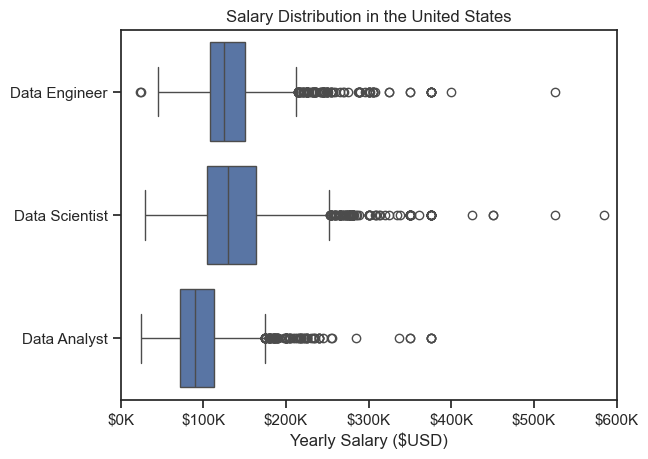

In [7]:
job_titles=['Data Analyst', 'Data Engineer','Data Scientist']
df_US=df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()
sns.boxplot(data=df_US,x='salary_year_avg',y='job_title_short')
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()
